In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
def show_results(model, dataloader, over=0.9, under=0.1):
    scene_over = []
    scene_under = []
    count = 0
    for X_val, Y_val in dataloader:
        x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
        X_val = preprocess(X_val).to(device)
        Y_val = Y_val[:, 0].to(device)
        y_pred = model(X_val)[:, 0].detach().cpu().numpy()

        scene_over.append(x_raw[y_pred>over])
        scene_under.append(x_raw[y_pred<under])
        count += 1
        if count > 20:
            break

    scene_over = np.concatenate(scene_over, axis=0)
    scene_under = np.concatenate(scene_under, axis=0)

    print("Score > ", over)
    scene_vstack = []
    fig = plt.figure(figsize=(16, 9))
    for i in range(3):
        scene_hstack = np.concatenate(scene_over[i*6: i*6+6], axis=1)
        scene_vstack.append(scene_hstack)
    scene_patches = np.concatenate(scene_vstack, axis=0)
    plt.imshow(scene_patches.astype(np.uint8))
    plt.show()

    print("Score < ", under)
    scene_vstack = []
    fig = plt.figure(figsize=(16, 9))
    for i in range(3):
        scene_hstack = np.concatenate(scene_under[i*6: i*6+6], axis=1)
        scene_vstack.append(scene_hstack)
    scene_patches = np.concatenate(scene_vstack, axis=0)
    plt.imshow(scene_patches.astype(np.uint8))
    plt.show()

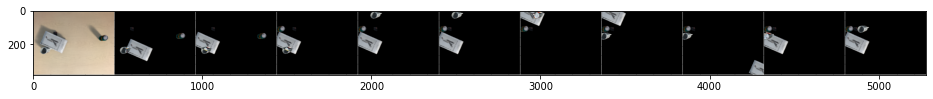

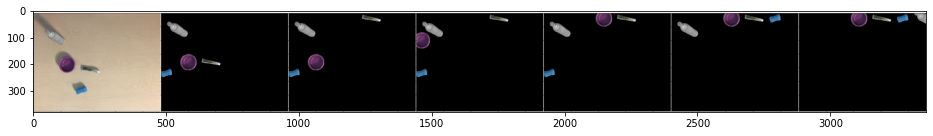

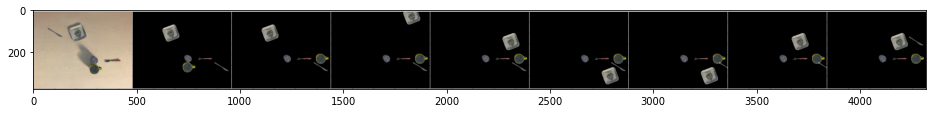

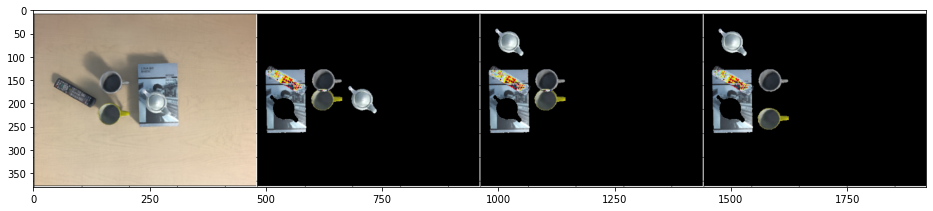

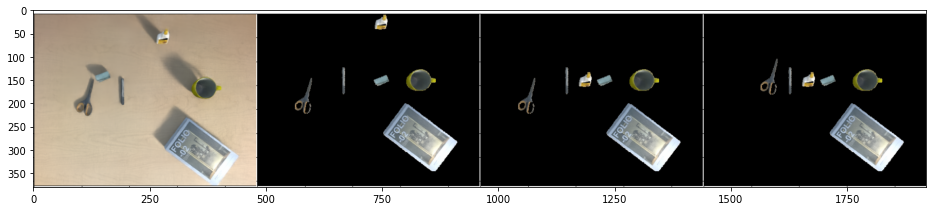

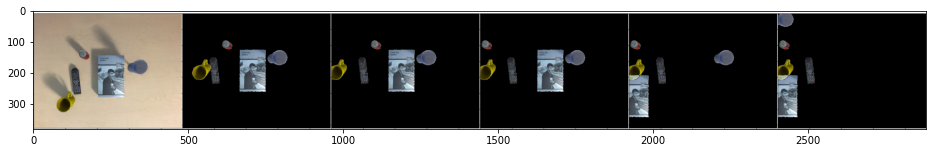

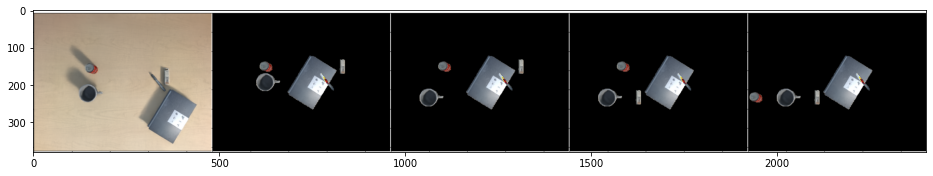

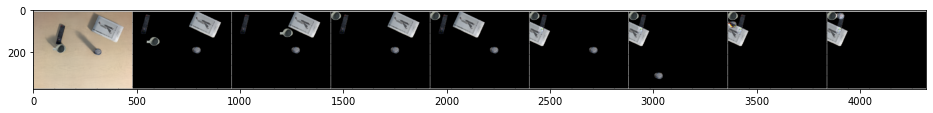

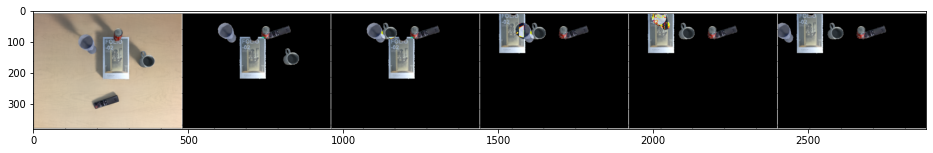

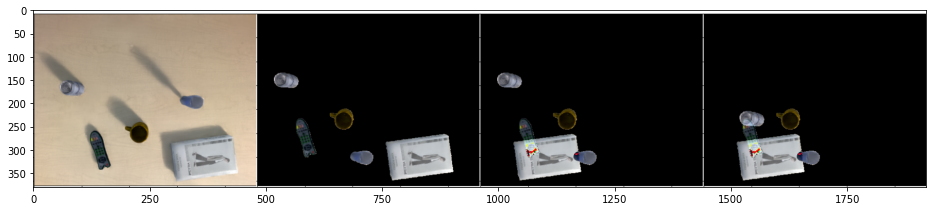

In [27]:
scenes = [7, 9, 10, 14, 21, 23, 24, 25, 27, 38]
for s in scenes:
    fig = plt.figure(figsize=(16, 25))
    scene_dir = 'data/mcts/scene-%d'%s
    files = sorted(os.listdir(scene_dir))
    
    x = np.array(Image.open(os.path.join(scene_dir, 'initial.png')))
    images = []
    images.append(x[50:-50, 80:-80])
    for f in files:
        if f.startswith('iter_'):
            x = np.array(Image.open(os.path.join(scene_dir, f)))
            images.append(x[50:-50, 80:-80])
    x_cat = np.concatenate(images, axis=1)
    image_cat = Image.fromarray(x_cat)
    image_cat.save('data/sample_%d.png'%s)
    plt.imshow(x_cat.astype(np.uint8))    
    plt.show()